In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# Load dataset
csv_file_path = "../caption_from_body/posts_caption_from_body.csv"  # Update with your file path
df = pd.read_csv(csv_file_path)
df.head()

,PostID,Caption,Body,Tags,Location
0,1,Food for air travel,For most of our flights starting from our airp...,NaN,NaN
1,2,Would you rather spend 2 days in Edinburgh and...,In July we are going on a 16 day trip to Europ...,NaN,NaN
2,3,If you’ve done a Caribbean or Bahamas cruise w...,I’m in Dallas so I’d have to fly to Miami or s...,NaN,NaN
3,4,"One week in Spain, the other week in….where?",We are attending a family reunion in southern ...,NaN,NaN
4,5,Munich/Spain Itinerary,"Hey guys, hoping someone who's visited some of...",NaN,NaN


In [95]:
# Combine Caption and Body for text analysis
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")
df.head()

,PostID,Caption,Body,Tags,Location,text
0,1,Food for air travel,For most of our flights starting from our airp...,NaN,NaN,Food for air travel For most of our flights st...
1,2,Would you rather spend 2 days in Edinburgh and...,In July we are going on a 16 day trip to Europ...,NaN,NaN,Would you rather spend 2 days in Edinburgh and...
2,3,If you’ve done a Caribbean or Bahamas cruise w...,I’m in Dallas so I’d have to fly to Miami or s...,NaN,NaN,If you’ve done a Caribbean or Bahamas cruise w...
3,4,"One week in Spain, the other week in….where?",We are attending a family reunion in southern ...,NaN,NaN,"One week in Spain, the other week in….where? W..."
4,5,Munich/Spain Itinerary,"Hey guys, hoping someone who's visited some of...",NaN,NaN,"Munich/Spain Itinerary Hey guys, hoping someon..."


In [120]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
text_vectors = vectorizer.fit_transform(df["text"])

# Compute Pairwise Distance Matrix for DBSCAN
distance_matrix = euclidean_distances(text_vectors)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.7, min_samples=3, metric="euclidean")  # Tune eps and min_samples
df["Cluster"] = dbscan.fit_predict(text_vectors)

In [121]:
# Save clustered data
df.to_csv("../caption_from_body/posts_dbscan_euclidean.csv", index=False)

# Count the number of clusters (-1 means noise/outliers)
cluster_counts = df["Cluster"].value_counts()

# Print cluster details
print("Cluster Distribution:")
print(cluster_counts)

Cluster Distribution:
Cluster
-1     1855
 9        7
 7        7
 8        6
 1        3
 0        3
 3        3
 2        3
 6        3
 5        3
 4        3
 10       3
Name: count, dtype: int64


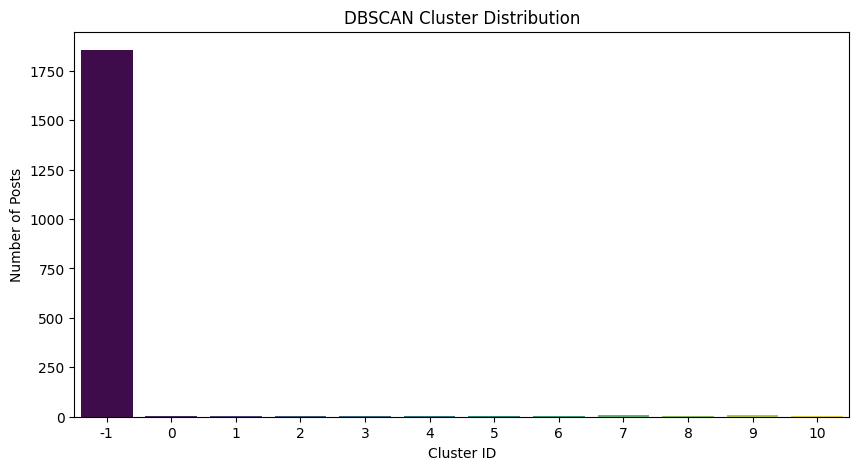

In [122]:
# Plot Cluster Distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette="viridis", legend=False)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Posts")
plt.title("DBSCAN Cluster Distribution")
plt.show()

In [123]:
# cosine could be better as euclidean distance in high dimensional space doesn't work well (curse of dimensionality)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
text_vectors = vectorizer.fit_transform(df["text"])

# Apply DBSCAN with cosine similarity
dbscan = DBSCAN(eps=0.7, min_samples=5, metric="cosine")  # Tune eps and min_samples
df["Cluster"] = dbscan.fit_predict(text_vectors)


In [124]:
# Save clustered data
df.to_csv("../caption_from_body/posts_dbscan_cosine.csv", index=False)

# Count the number of clusters (-1 means noise/outliers)
cluster_counts = df["Cluster"].value_counts()

# Print cluster details
print("Cluster Distribution:")
print(cluster_counts)

Cluster Distribution:
Cluster
-1     1439
 0      339
 4       32
 1       20
 6       15
 2        8
 7        7
 9        6
 10       6
 5        6
 12       6
 8        5
 3        5
 11       5
Name: count, dtype: int64


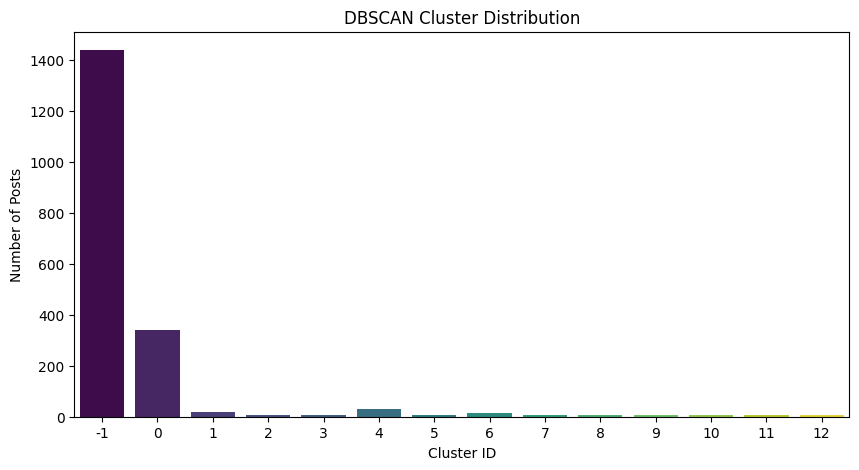

In [125]:
# Plot Cluster Distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette="viridis", legend=False)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Posts")
plt.title("DBSCAN Cluster Distribution")
plt.show()